# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

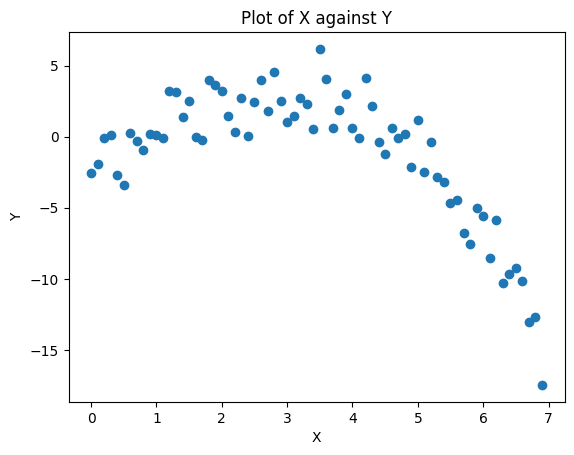

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]
y = xy_data[:,1]
plt.scatter(x, y)
plt.title("Plot of X against Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
def polyreg(data_matrix, k):
    # If the specified degree k is greater than or equal to N, then fit an N-1 polynomial, and set remaining values to zero
    if k >= np.shape(data_matrix)[0]:
        k = np.shape(data_matrix)[0] - 1
    
    # Create a column of all ones for the first column vector
    all_ones = np.ones((np.shape(data_matrix)[0], 1))
    
    # Create the X matrix
    X = all_ones
    
    #Create a 2D array of the first column of data matrix
    p = np.atleast_2d(data_matrix[:,0]).T
    
    # For each degree k, append a column of x^k to X
    for i in range(1, k+1):
        X = np.hstack((X, p**i))
    
    # Creating the beta value vector
    yvalues = data_matrix[:,1]
    beta_vector = np.linalg.lstsq(X, yvalues, rcond=None)[0] 
    
    # Finding the fit
    fit = X.dot(beta_vector)
    
    # Making the residuals vector
    residual_vector = yvalues - fit
    
    return np.transpose(beta_vector), fit, residual_vector
# The function should return the coefficient vector beta, the fit, and the vector of residuals

Use the tests below to check the outputs of the function you have written:

In [5]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

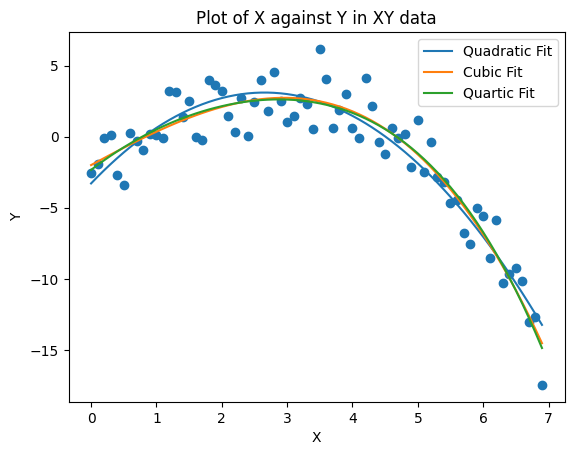

Quadratic Fit: SSE = 172.181, Coefficient of Determination = 0.888 
 Cubic Fit: SSE = 152.406, Coefficient of Determination = 0.901 
 Quartic Fit: SSE = 151.228, Coefficient of Determination = 0.901


In [6]:
# Plotting the graph with various fits
plt.scatter(xy_data[:,0], xy_data[:,1])
plt.plot(xy_data[:,0], polyreg(xy_data, 2)[1], label = "Quadratic Fit")
plt.plot(xy_data[:,0], polyreg(xy_data, 3)[1], label = "Cubic Fit")
plt.plot(xy_data[:,0], polyreg(xy_data, 4)[1], label = "Quartic Fit")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of X against Y in XY data")
plt.show()

#Computing the SSE & R squared
SSE_0 = np.sum(polyreg(xy_data, 0)[2]**2)

SSE_2 = np.sum(polyreg(xy_data, 2)[2]**2).round(3)
R2_2 = (1 - SSE_2/SSE_0).round(3)

SSE_3 = np.sum(polyreg(xy_data, 3)[2]**2).round(3)
R2_3 = (1 - SSE_3/SSE_0).round(3)

SSE_4 = np.sum(polyreg(xy_data, 4)[2]**2).round(3)
R2_4 = (1 - SSE_4/SSE_0).round(3)

print(f"Quadratic Fit: SSE = {SSE_2}, Coefficient of Determination = {R2_2} \n Cubic Fit: SSE = {SSE_3}, Coefficient of Determination = {R2_3} \n Quartic Fit: SSE = {SSE_4}, Coefficient of Determination = {R2_4}")

 #### State which model you choose and briefly justify your choice.
 
 
<span style="color:red"><font size="5">*"I would choose the Cubic Fit, because it has an identical Coefficient of Determination to the Quartic Fit (to 3dp) and requires less computational effort because it's of a lower order. This means that the proportion of the variance explained by the Quartic Fit is practically equal to that of the Cubic Fit, and there is therefore no need for the Quartic Fit!"*</font></span>
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

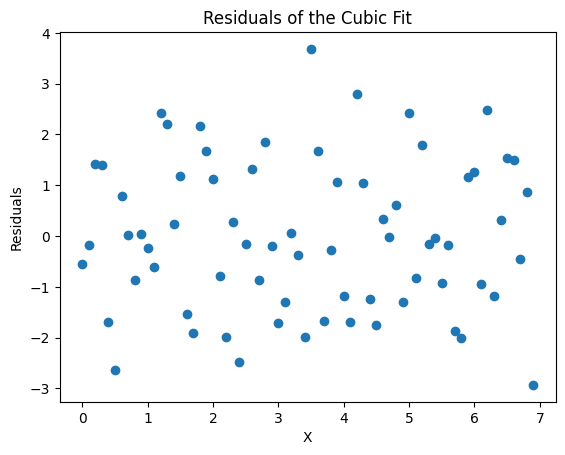

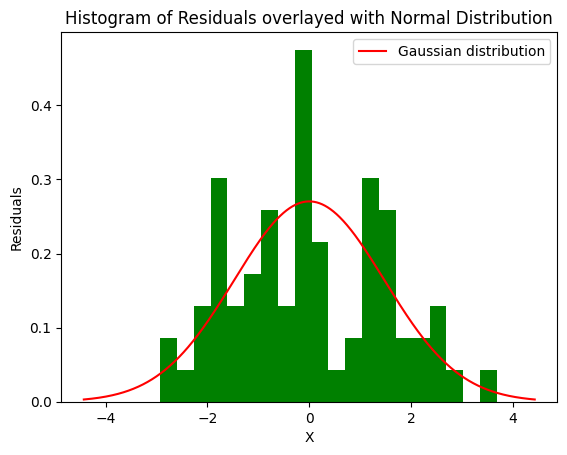

In [7]:
from scipy.stats import norm

# Plotting the Residuals as a Scatter Graph
model = polyreg(xy_data, 3)
plt.scatter(xy_data[:,0], model[2])
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals of the Cubic Fit")
plt.show()

# Plotting a histogram of the residuals along with a Gaussian pdf
n, bins, patches = plt.hist(model[2], bins=20, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(model[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r', label = "Gaussian distribution")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Histogram of Residuals overlayed with Normal Distribution")
plt.legend()
plt.show()
